## Project 1 - Consumer Sentiment Analysis

## Problem Statement - McDonald's Customer Sentiment Analysis

<div style="display: flex;">
  <div style="flex: 1; padding-right: 20px;">
  <p>
    McDonald's, as a global fast-food chain, continuously receives feedback from customers through reviews, social media comments, and surveys. Customer sentiment analysis involves extracting emotions, opinions, and attitudes expressed in this feedback to understand customer satisfaction, predict behavior, and identify areas for improvement.
  </p>
  <p>
    In this project, we aim to:
  </p>
  <ul>
    <li>Analyze customer feedback related to McDonald's food, service, and experience to determine whether the sentiment is positive, negative, or neutral.</li>
    <li>Use natural language processing (NLP) techniques and machine learning models to classify customer sentiments.</li>
    <li>Identify key drivers for satisfaction or dissatisfaction, such as menu items, delivery speed, service quality, or pricing.</li>
  </ul>
  </div>
  <div style="flex: 1;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/McDonald%27s_logo.svg/2560px-McDonald%27s_logo.svg.png" 
         alt="McDonald's Fast Food Sign" style="max-width: 75%; height: auto;" />
  </div>
</div>


In [9]:
import pandas as pd
import numpy as np
import json
import requests

# Basic setup
# pd.set_option('display.max_rows', None)  # None means no limit
# pd.set_option('display.max_columns', None)  # None means no limit

# Reading the data from csv file
mcReviews = pd.read_csv('McDonald_s_Reviews.csv', encoding_errors="ignore")
mcReviews




,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
2,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
3,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
4,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
...,...,...,...,...,...,...,...,...,...,...
883,881,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,-91.919243,"1,028",4 years ago,"I like McDonald���������������������������s, j...",1 star
884,882,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,-91.919243,"1,028",a year ago,Slow service inside take out.for breakfast.. w...,3 stars
885,883,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,-91.919243,"1,028",4 years ago,I eat fast food maybe once a month. Have been ...,1 star
886,884,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,-91.919243,"1,028",2 years ago,"Wind Gap, PA location was surprisingly better ...",4 stars


 #### Adding city name to the table from ```bigdatacloud``` api by passing latitude and lingitude from the table

In [10]:
def getCity(row):
    lat = row[2]
    lng = row[3]
    res = requests.get('https://api.bigdatacloud.net/data/reverse-geocode-client?latitude=${lat}&longitude=${lng}')
    return res.json()['city']

mcReviews['city'] = mcReviews.apply(lambda row: getCity(row), axis=1)
mcReviews


C:\Users\HP\AppData\Local\Temp\ipykernel_4360\1233662463.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat = row[2]
C:\Users\HP\AppData\Local\Temp\ipykernel_4360\1233662463.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lng = row[3]


,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,city
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Mulshi
1,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Mulshi
2,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Mulshi
3,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Mulshi
4,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,Mulshi
...,...,...,...,...,...,...,...,...,...,...,...
883,881,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,-91.919243,"1,028",4 years ago,"I like McDonald���������������������������s, j...",1 star,Mulshi
884,882,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,-91.919243,"1,028",a year ago,Slow service inside take out.for breakfast.. w...,3 stars,Mulshi
885,883,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,-91.919243,"1,028",4 years ago,I eat fast food maybe once a month. Have been ...,1 star,Mulshi
886,884,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,-91.919243,"1,028",2 years ago,"Wind Gap, PA location was surprisingly better ...",4 stars,Mulshi


#### Dropping unnessary columns from the table

In [11]:
mcReviews = mcReviews.drop(['store_name', 'category', 'latitude', 'longitude'], axis=1, errors='ignore')
mcReviews

,reviewer_id,store_address,latitude,rating_count,review_time,review,rating,city
0,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Mulshi
1,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Mulshi
2,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Mulshi
3,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Mulshi
4,2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,Mulshi
...,...,...,...,...,...,...,...,...
883,881,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",4 years ago,"I like McDonald���������������������������s, j...",1 star,Mulshi
884,882,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",a year ago,Slow service inside take out.for breakfast.. w...,3 stars,Mulshi
885,883,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",4 years ago,I eat fast food maybe once a month. Have been ...,1 star,Mulshi
886,884,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",2 years ago,"Wind Gap, PA location was surprisingly better ...",4 stars,Mulshi


#### 1. Handlling missing values and duplicates

In [12]:
# 1.1 Missing Values

missingValues = mcReviews.isnull().sum()
missingValues

reviewer_id      0
store_address    0
latitude         0
rating_count     0
review_time      0
review           0
rating           0
city             0
dtype: int64

In [13]:
# 1.2 Drop rows with any missing values
mcReviewsCleaned = mcReviews.dropna()
mcReviewsCleaned

,reviewer_id,store_address,latitude,rating_count,review_time,review,rating,city
0,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Mulshi
1,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Mulshi
2,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Mulshi
3,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Mulshi
4,2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,Mulshi
...,...,...,...,...,...,...,...,...
883,881,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",4 years ago,"I like McDonald���������������������������s, j...",1 star,Mulshi
884,882,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",a year ago,Slow service inside take out.for breakfast.. w...,3 stars,Mulshi
885,883,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",4 years ago,I eat fast food maybe once a month. Have been ...,1 star,Mulshi
886,884,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",2 years ago,"Wind Gap, PA location was surprisingly better ...",4 stars,Mulshi


#### 2. Handling duplicates

In [14]:
# 2.1 Check for duplicate store_address
duplicates = mcReviews['reviewer_id'].duplicated().sum()
duplicates

np.int64(3)

In [15]:
# 2.2 Remove duplicate reviewers from the table
mcReviews.drop_duplicates(subset=['reviewer_id'])
mcReviews


,reviewer_id,store_address,latitude,rating_count,review_time,review,rating,city
0,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Mulshi
1,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Mulshi
2,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Mulshi
3,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Mulshi
4,2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,Mulshi
...,...,...,...,...,...,...,...,...
883,881,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",4 years ago,"I like McDonald���������������������������s, j...",1 star,Mulshi
884,882,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",a year ago,Slow service inside take out.for breakfast.. w...,3 stars,Mulshi
885,883,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",4 years ago,I eat fast food maybe once a month. Have been ...,1 star,Mulshi
886,884,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",2 years ago,"Wind Gap, PA location was surprisingly better ...",4 stars,Mulshi


#### 3. Handling Categorical Values

In [17]:
from sklearn.preprocessing import LabelEncoder

# Alternatively, list only categorical columns
categorical_cols = mcReviews.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['store_address', 'rating_count', 'review_time', 'review', 'rating',
       'city'],
      dtype='object')


In [26]:
# Conveting feature 'rating' into integer
mcReviews['rating'] = mcReviews['rating'].apply(lambda x: int(x.split()[0]))
mcReviews

,reviewer_id,store_address,latitude,rating_count,review_time,review,rating,city
0,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1,Mulshi
1,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1,Mulshi
2,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1,Mulshi
3,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1,Mulshi
4,2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4,Mulshi
...,...,...,...,...,...,...,...,...
883,881,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",4 years ago,"I like McDonald���������������������������s, j...",1,Mulshi
884,882,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",a year ago,Slow service inside take out.for breakfast.. w...,3,Mulshi
885,883,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",4 years ago,I eat fast food maybe once a month. Have been ...,1,Mulshi
886,884,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",2 years ago,"Wind Gap, PA location was surprisingly better ...",4,Mulshi


#### 4. Detection of outliers using box plot

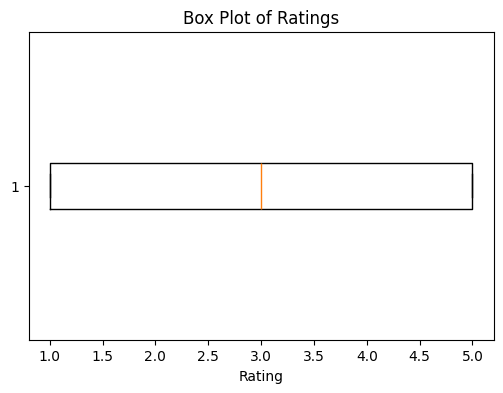

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.boxplot(mcReviews['rating'], vert=False)
plt.title('Box Plot of Ratings')
plt.xlabel('Rating')
plt.show()

In [36]:
# Select the numeric columns
numeric_cols = ['rating']

# Calculate descriptive statistics
stats = {
    'Mean': mcReviews[numeric_cols].mean(),
    'Median': mcReviews[numeric_cols].median(),
    'Mode': mcReviews[numeric_cols].mode().iloc[0], 
    'Range': mcReviews[numeric_cols].max() - mcReviews[numeric_cols].min(),
    'IQR': mcReviews[numeric_cols].quantile(0.75) - mcReviews[numeric_cols].quantile(0.25),
    'Variance': mcReviews[numeric_cols].var(),
    'Standard Deviation': mcReviews[numeric_cols].std(),
    'Coefficient of Variation': mcReviews[numeric_cols].std() / mcReviews[numeric_cols].mean(),
    'Mean Absolute Deviation': mcReviews.apply(lambda x: x)
}

# Display the statistics
for stat, value in stats.items():
    print(f"\n{stat}:\n{value}")


Mean:
rating    3.10473
dtype: float64

Median:
rating    3.0
dtype: float64

Mode:
rating    5
Name: 0, dtype: int64

Range:
rating    4
dtype: int64

IQR:
rating    4.0
dtype: float64

Variance:
rating    2.506494
dtype: float64

Standard Deviation:
rating    1.583191
dtype: float64

Coefficient of Variation:
rating    0.509929
dtype: float64

Mean Absolute Deviation:
     reviewer_id                                      store_address  \
0              1  13749 US-183 Hwy, Austin, TX 78750, United States   
1              1  13749 US-183 Hwy, Austin, TX 78750, United States   
2              1  13749 US-183 Hwy, Austin, TX 78750, United States   
3              1  13749 US-183 Hwy, Austin, TX 78750, United States   
4              2  13749 US-183 Hwy, Austin, TX 78750, United States   
..           ...                                                ...   
883          881  1698 US-209, Brodheadsville, PA 18322, United ...   
884          882  1698 US-209, Brodheadsville, PA 18322, U